In [97]:
! git pull

Already up to date.


In [98]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
qemu_path = os.getenv('MOD_QEMU')
results_root = f'{qemu_path}/evals/runs'


In [100]:
def get_avg_duration(size, runsdir=''):
    durations = []
    # empty df
    events = pd.DataFrame()
    df = pd.read_csv(f'{qemu_path}/evals/{runsdir}/runs/run1G/run8.csv')
    events = df.iloc[:,2]
    
    
    for i in range(1,11):
        df = pd.read_csv(f'{qemu_path}/evals/{runsdir}/runs/run{size}G/run{i}.csv')
        events = df.iloc[:,2]
        
        df = df.iloc[:,-1]
        durations.append(df)

    # create a new dataframe with the average of the last column of all the csv files
    df = pd.concat(durations, axis=1).mean(axis=1)
    # print(df.to_string(index=False))
    # print(events.to_string(index=False))
    # combine df and events
    df = pd.concat([events, df], axis=1)
    df.columns = ['event', 'duration']
    return df

## Vanilla

In [101]:
df1 = get_avg_duration(1, 'backup/run_vanilla')
df2 = get_avg_duration(2, 'backup/run_vanilla')
df3 = get_avg_duration(3, 'backup/run_vanilla')
df4 = get_avg_duration(4, 'backup/run_vanilla')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)
df


,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.00000,0.000,0.000,0.000
1,Starting parent,92.82500,102.518,102.083,102.896
2,Started wait for iothread lock,0.38700,0.580,0.509,0.710
3,Acquired iothread lock,0.01800,0.056,0.022,0.115
4,HMP done in parent,0.04600,0.152,0.102,0.198
5,Starting child,10222.62600,0.453,0.175,0.261
6,Restored threads,22.71800,0.438,0.467,0.503
7,Started wait for iothread lock,1.60200,1.021,0.578,0.962
8,Acquired iothread lock,0.02125,0.054,0.030,1.232
9,Got the socket conn CHILD,406.15250,373.602,389.985,402.917


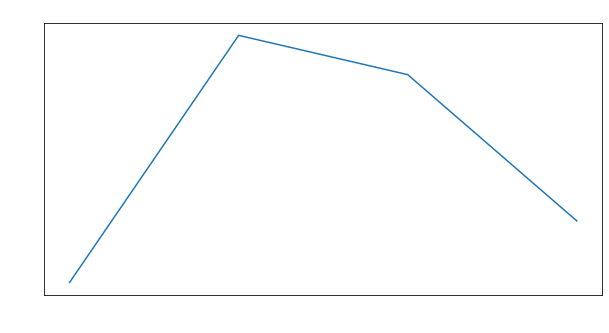

In [102]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[16,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()


vanilla_load_time = df.iloc[16,1:]

In [103]:
# print the mean of the 16th row
print(df.iloc[16,1:].mean())

8.1283125


## ODF Enabled

In [104]:
df1 = get_avg_duration(1, 'backup/run_odf')
df2 = get_avg_duration(2, 'backup/run_odf')
df3 = get_avg_duration(3, 'backup/run_odf')
df4 = get_avg_duration(4, 'backup/run_odf')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)

df

,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000,0.000,0.000,0.000
1,Starting parent,101.751,104.121,104.450,102.259
2,Started wait for iothread lock,0.562,0.543,0.372,0.511
3,Starting child,0.044,0.119,0.154,0.074
4,Restored threads,0.162,0.215,0.151,0.174
5,Acquired iothread lock,0.313,0.669,0.485,0.246
6,HMP done in parent,0.501,0.511,0.305,0.887
7,Started wait for iothread lock,0.854,1.271,0.668,1.278
8,Acquired iothread lock,0.016,1.224,1.722,0.063
9,Got the socket conn CHILD,392.712,395.477,386.682,404.376


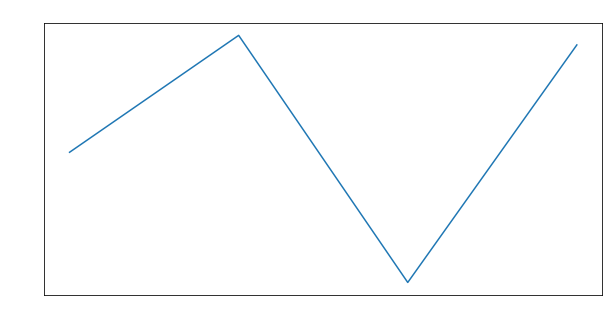

In [105]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[16,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()

odf_load_time = df.iloc[16,1:]


In [106]:
# print the mean of the 16th row
print(df.iloc[16,1:].mean())

8.084000000000001


## ODF + EPT 

In [107]:
df1 = get_avg_duration(1, 'backup/run_odf_ept')
df2 = get_avg_duration(2, 'backup/run_odf_ept')
df3 = get_avg_duration(3, 'backup/run_odf_ept')
df4 = get_avg_duration(4, 'backup/run_odf_ept')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)
df



,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.00000,0.000,0.000,0.000
1,Starting parent,102.11100,101.124,101.120,101.185
2,Starting child,0.59500,0.517,0.520,0.486
3,Started wait for iothread lock,0.06600,0.093,0.117,0.074
4,Restored threads,0.14600,0.047,0.032,0.048
5,Started wait for iothread lock,6133.97400,0.220,0.111,0.302
6,Acquired iothread lock,21.94500,0.738,0.619,0.480
7,HMP done in parent,1.37800,1.134,0.898,0.951
8,Acquired iothread lock,1.03375,0.147,0.025,0.029
9,Got the socket conn CHILD,366.55500,351.354,410.058,347.797


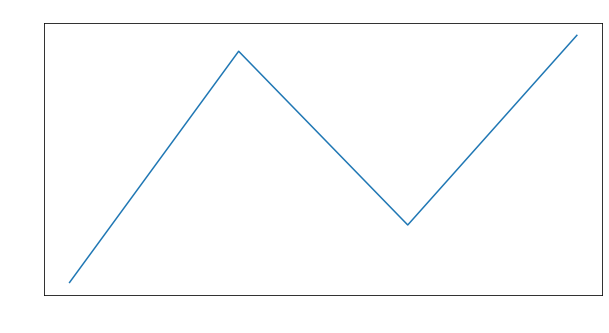

In [108]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[18,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()

odf_ept_load_time = df.iloc[18,1:]
odf_ept_share_latency = df.iloc[12,1:]



In [109]:
# print the mean of the 16th row
print(df.iloc[18,1:].mean())

7.5655625


## Only EPT

In [110]:
df1 = get_avg_duration(1, 'backup/run_ept')
df2 = get_avg_duration(2, 'backup/run_ept')
df3 = get_avg_duration(3, 'backup/run_ept')
df4 = get_avg_duration(4, 'backup/run_ept')
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)
df


,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000,0.000,0.000,0.000
1,Starting parent,102.987,101.738,102.141,102.172
2,Starting child,0.399,0.456,0.462,0.410
3,Started wait for iothread lock,0.203,0.114,0.196,0.157
4,Restored threads,0.173,0.091,0.125,0.080
5,Started wait for iothread lock,0.418,0.242,0.447,0.588
6,Acquired iothread lock,0.449,0.464,0.363,0.438
7,Acquired iothread lock,0.928,1.014,1.306,1.155
8,HMP done in parent,0.020,0.377,0.028,1.253
9,Got the socket conn CHILD,376.564,386.742,328.320,372.027


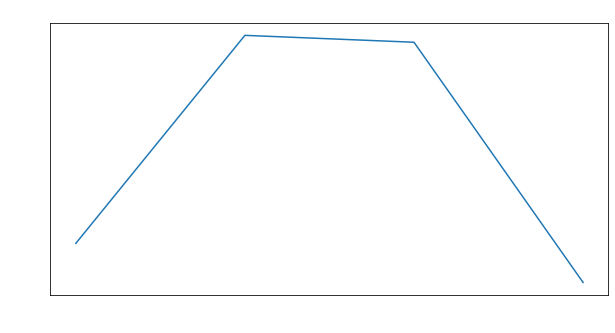

In [111]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[18,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()

ept_load_time = df.iloc[18,1:]
ept_share_latency = df.iloc[12,1:]


In [112]:
# print the mean of the 16th row
print(df.iloc[18,1:].mean())

10.2885


## Load State Comparison

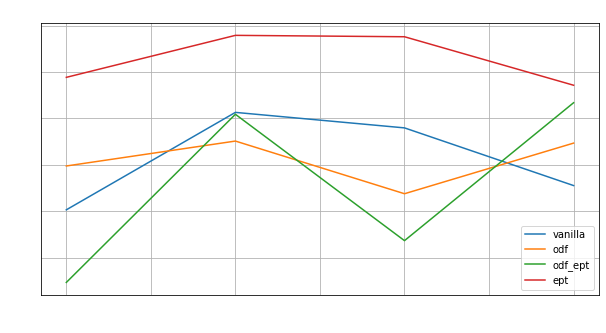

In [113]:
load_time = pd.concat([vanilla_load_time, odf_load_time, odf_ept_load_time, ept_load_time], axis=1)
load_time.columns = ['vanilla', 'odf', 'odf_ept', 'ept']
# plot each column using different colors and a legend
ax = load_time.plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')
plt.grid(True)

## KVM_EPT_ODF Latency Comparison

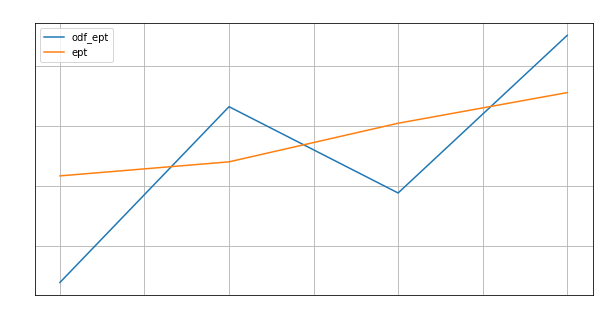

In [115]:
share_latency = pd.concat([odf_ept_share_latency, ept_share_latency], axis=1)
share_latency.columns = ['odf_ept', 'ept']
# plot each column using different colors and a legend
ax = share_latency.plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='EPT Share Latency')
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('EPT Share Latency', color='white')
plt.grid(True)

In [116]:
share_latency

,odf_ept,ept
1GB,4.3825,6.166
2GB,7.324,6.401
3GB,5.88,7.047
4GB,8.518,7.56
